In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [61]:
data = pd.read_csv('data.csv')

In [62]:
X = data['meanVolume']
y = (data['density_percent'] >=80).astype(np.int32)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.77,
                                                    shuffle=True)

In [64]:
X_train.shape, X_test.shape

((483,), (145,))

In [65]:
def log_loss(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred), axis=0) / len(y_true)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [66]:
m,n = X_train.shape[0], 1
print(f'Число объектов в обучающей выборке: {m}\nРазмерность объекта: {n}')

Число объектов в обучающей выборке: 483
Размерность объекта: 1


In [67]:
class LogisticRegression:
    
    def __init__(self):
        self.w = np.random.randn(n, 1) * 0.001
        self.b = np.random.randn() * 0.001
        self.report_every = 40

    def train(self, X, y, learning_rate=0.005, epochs=40):
        self.losses_train = []
        self.losses_test = []
        
        for epoch in range(epochs):            
            dw = np.zeros((n, 1))
            db = 0
            
            for i in range(len(X)):
                # forward propagation
                z = X[i].reshape(1, n).dot(self.w) + self.b
                a = sigmoid(z)[0][0]
                
                # gradient calculation
                dw += (a - y[i]) * X[i].reshape(n, 1)
                db += (a - y[i])
                
            dw /= len(X)
            db /= len(X)
            
            # gradient step
            self.w = self.w - learning_rate * dw
            self.b = self.b - learning_rate * db
            
            # save loss for plotting
            if epoch % self.report_every == 0:
                self.losses_train.append(log_loss(y, self.predict(X)))
                self.losses_test.append(log_loss(y_test, self.predict(X_test)))
        

    def train_vec(self, X, y, learning_rate=0.005, epochs=40):
        self.losses_train = []
        self.losses_test = []
        
        for epoch in range(epochs):            
            Z = X.values.reshape(m, n).dot(self.w) + self.b
            A = sigmoid(Z)
            
            dw = np.sum(X.values.reshape(m, n) * (A.reshape(m, 1) - y.values.reshape(m, 1)), axis=0) / len(X)
            db = np.sum((A.reshape(m, 1) - y.values.reshape(m, 1)), axis=0) / len(X)
            
            # gradient step
            self.w = self.w - learning_rate * dw.reshape(n, 1)
            self.b = self.b - learning_rate * db
            
            # save loss for plotting
            if epoch % self.report_every == 0:
                self.losses_train.append(log_loss(y, self.predict(X.values)))
                self.losses_test.append(log_loss(y_test, self.predict(X_test.values)))
    

    def predict(self, X):        
        return np.array([sigmoid(x.reshape(1, n).dot(self.w) + self.b)[0][0] 
                         for x in X])

In [68]:
%%time
logreg = LogisticRegression()
logreg.train_vec(X_train, y_train, epochs=500)

Wall time: 130 ms


C:\Users\fesevu\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
C:\Users\fesevu\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


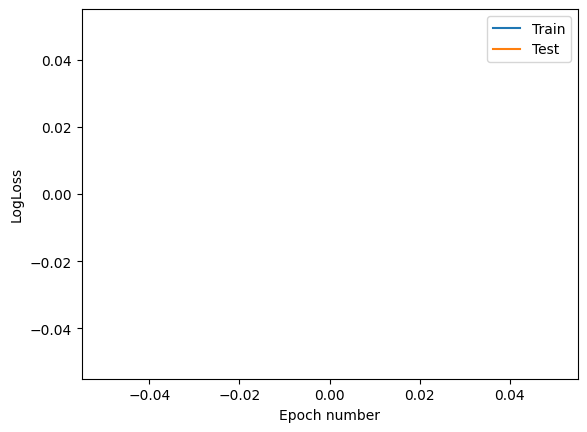

In [69]:
domain = np.arange(0, len(logreg.losses_train)) * logreg.report_every
plt.plot(domain, logreg.losses_train, label='Train')
plt.plot(domain, logreg.losses_test, label='Test')
plt.xlabel('Epoch number')
plt.ylabel('LogLoss')
plt.legend();